In [1]:
import pandas as pd

In [2]:
import sklearn; sklearn.show_versions()


System:
    python: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
executable: C:\ProgramData\Anaconda3\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 21.0.1
   setuptools: 52.0.0.post20210125
        numpy: 1.22.4
        scipy: 1.6.2
       Cython: 0.29.23
       pandas: 2.0.3
   matplotlib: 3.6.3
       joblib: 1.2.0
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libopenblas
       filepath: C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
        version: 0.3.18
threading_layer: pthreads
   architecture: Zen

       user_api: blas
   internal_api: mkl
    num_threads: 6
         prefix: mkl_rt
       filepath: C:\ProgramData\Anaconda3\Library\bin\mkl_rt.1.dll
        version: 2021.2-Product
threading_layer:

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv('data/train.csv', index_col=0)

In [7]:
train

,user_id,ts,gate_id
0,18,2022-07-29 09:08:54,7
1,18,2022-07-29 09:09:54,9
2,18,2022-07-29 09:09:54,9
3,18,2022-07-29 09:10:06,5
4,18,2022-07-29 09:10:08,5
...,...,...,...
37513,6,2022-12-31 20:38:56,11
37514,6,2022-12-31 20:39:22,6
37515,6,2022-12-31 20:39:23,6
37516,6,2022-12-31 20:39:31,9


In [8]:
test = pd.read_csv('data/test.csv', index_col=0)

In [9]:
test

,ts,gate_id,user_word
37518,2023-01-03 08:21:00,9,gini
37519,2023-01-03 08:21:00,9,gini
37520,2023-01-03 08:21:18,5,gini
37521,2023-01-03 08:21:19,5,gini
37522,2023-01-03 08:21:39,10,gini
...,...,...,...
44638,2023-02-24 19:43:36,11,collinear
44639,2023-02-24 19:44:00,4,collinear
44640,2023-02-24 19:44:01,4,collinear
44641,2023-02-24 19:44:09,9,collinear


In [10]:
all_data = pd.concat([train, test], axis=0)

In [11]:
all_data

,user_id,ts,gate_id,user_word
0,18.0,2022-07-29 09:08:54,7,NaN
1,18.0,2022-07-29 09:09:54,9,NaN
2,18.0,2022-07-29 09:09:54,9,NaN
3,18.0,2022-07-29 09:10:06,5,NaN
4,18.0,2022-07-29 09:10:08,5,NaN
...,...,...,...,...
44638,NaN,2023-02-24 19:43:36,11,collinear
44639,NaN,2023-02-24 19:44:00,4,collinear
44640,NaN,2023-02-24 19:44:01,4,collinear
44641,NaN,2023-02-24 19:44:09,9,collinear


In [12]:
# Доля тест во всей выборке

sum(all_data['user_word'].notnull()) / all_data['user_word'].shape[0] 

0.1595994892816343

In [13]:
all_data['ts'] = pd.to_datetime(all_data['ts'])

<AxesSubplot: >

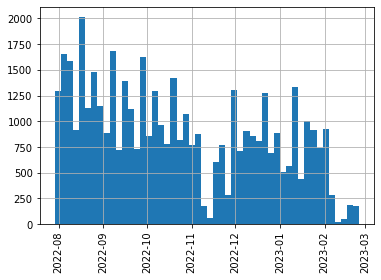

In [14]:
plt.figure()
plt.xticks(rotation='vertical')
all_data['ts'].hist(bins=50)

# Here we continue

In [15]:
train_gate_list = sorted(list(train['gate_id'].unique()))

In [16]:
test_gate_list = sorted(list(test['gate_id'].unique()))

In [17]:
only_test = [gate for gate in test_gate_list if gate not in train_gate_list]

In [18]:
only_test

[2]

In [19]:
test[test['gate_id']==2]

,ts,gate_id,user_word
39911,2023-01-13 16:49:52,2,categorical
39912,2023-01-13 16:49:54,2,categorical
39928,2023-01-13 18:21:16,2,categorical
39929,2023-01-13 18:21:19,2,categorical


In [20]:
all_gates = sorted(list(all_data['gate_id'].unique()))
all_gates

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [21]:
# Составим список турникетов вида "gate_номер"

list_gate_vars = ['gate_'+str(i) for i in all_gates]

In [22]:
# Теперь: cделаем бинарные переменные

new_vals = pd.get_dummies(all_data['gate_id']).values 

In [23]:
# Припишем новые бинарные переменные "турникет" к полной выборке

all_data[list_gate_vars] = new_vals

In [24]:
# Список дней недели

list_dow = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [25]:
# Припишем новые бинарные переменные "день недели" к полной выборке

all_data[list_dow] = pd.get_dummies(all_data['ts'].dt.day_name())[list_dow].values

In [26]:
all_data['ts'].dt.day_name().value_counts()

ts
Friday       9498
Thursday     8907
Wednesday    8572
Monday       8294
Tuesday      8196
Saturday      789
Sunday        387
Name: count, dtype: int64

In [27]:
all_data['hour'] = all_data['ts'].dt.hour.values

In [28]:
# Список переменных вида "hour_час в полной выборке"

list_hours = ['hour_'+str(i) for i in sorted(list(all_data['ts'].dt.hour.unique()))] 

In [29]:
# Добавим бинарные переменные для месяца

all_data[list_hours] = pd.get_dummies(all_data['ts'].dt.hour.values).values

In [30]:
all_data['min'] = all_data['ts'].dt.minute.values

In [31]:
all_data['day'] = all_data['ts'].dt.day.values

In [32]:
all_data['month'] = all_data['ts'].dt.month.values

In [33]:
all_data['dayofweek'] = all_data['ts'].dt.dayofweek.values

In [34]:
all_data.columns

Index(['user_id', 'ts', 'gate_id', 'user_word', 'gate_-1', 'gate_0', 'gate_1',
       'gate_2', 'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8',
       'gate_9', 'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14',
       'gate_15', 'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'hour', 'hour_0', 'hour_1', 'hour_3',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'min', 'day',
       'month', 'dayofweek'],
      dtype='object')

In [35]:
train['ts'].agg(['max','count'])

max      2022-12-31 20:39:31
count                  37518
Name: ts, dtype: object

In [36]:
test['ts'].agg(['min','max','count'])

min      2023-01-03 08:21:00
max      2023-02-24 19:44:09
count                   7125
Name: ts, dtype: object

# Val index

In [37]:
val_index = train['ts'] > '2022-11-30'

In [38]:
sum(val_index) / val_index.shape[0]

0.18612399381630151

In [39]:
all_data.head(2)

,user_id,ts,gate_id,user_word,gate_-1,gate_0,gate_1,gate_2,gate_3,gate_4,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,min,day,month,dayofweek
0,18.0,2022-07-29 09:08:54,7,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,8,29,7,4
1,18.0,2022-07-29 09:09:54,9,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,9,29,7,4


In [40]:
train_idx = all_data['user_word'].isnull()
train = all_data.loc[train_idx]
test = all_data.loc[~train_idx]

In [41]:
print(train.tail(1), test.head(1))

       user_id                  ts  gate_id user_word  gate_-1  gate_0  \
37517      6.0 2022-12-31 20:39:31        9       NaN    False   False   

       gate_1  gate_2  gate_3  gate_4  ...  hour_18  hour_19  hour_20  \
37517   False   False   False   False  ...    False    False     True   

       hour_21  hour_22  hour_23  min  day  month  dayofweek  
37517    False    False    False   39   31     12          5  

[1 rows x 55 columns]        user_id                  ts  gate_id user_word  gate_-1  gate_0  \
37518      NaN 2023-01-03 08:21:00        9      gini    False   False   

       gate_1  gate_2  gate_3  gate_4  ...  hour_18  hour_19  hour_20  \
37518   False   False   False   False  ...    False    False    False   

       hour_21  hour_22  hour_23  min  day  month  dayofweek  
37518    False    False    False   21    3      1          1  

[1 rows x 55 columns]


In [42]:
X = train[~val_index].copy()
X_val = train[val_index].copy()

y = X['user_id'].astype(int)
y_val = X_val['user_id'].astype(int)

In [43]:
cols_cat = list(all_data.columns[4:])

In [44]:
X = X[cols_cat].astype(int)
X_val = X_val[cols_cat].astype(int)

In [45]:
X

,gate_-1,gate_0,gate_1,gate_2,gate_3,gate_4,gate_5,gate_6,gate_7,gate_8,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,min,day,month,dayofweek
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,8,29,7,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,7,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,7,4
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,10,29,7,4
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,10,29,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,46,29,11,1
30531,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,50,29,11,1
30532,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,50,29,11,1
30533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,50,29,11,1


In [46]:
# Сделаем нормирование отдельными скейлерами по X и по X_val, т.к. будущие данные скорее всего изменятся

scaler_X = StandardScaler()
scaler_X_val = StandardScaler()

scaler_X.fit(X)
scaler_X_val.fit(X_val)

X_scaled = scaler_X.transform(X)
X_val_scaled = scaler_X_val.transform(X_val)

In [47]:
print('Признаки, всего', len(X.columns), list(X.columns))

Признаки, всего 51 ['gate_-1', 'gate_0', 'gate_1', 'gate_2', 'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8', 'gate_9', 'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14', 'gate_15', 'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'hour', 'hour_0', 'hour_1', 'hour_3', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'min', 'day', 'month', 'dayofweek']


In [48]:
clf = LogisticRegression(random_state=1,solver='saga').fit(X_scaled, y)

y_pred = clf.predict(X_scaled)

y_val_pred = clf.predict(X_val_scaled)

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [49]:
# Сделаем словарь для val, набодобие того, который нужно предсказать

user_dict_val = dict() 
inverse_user_dict_val = dict()

y_val_list = list(y_val.unique())
for i in range(len(y_val_list)):
    user_dict_val[y_val_list[i]] = 'user_'+str(i)
    inverse_user_dict_val['user_'+str(i)] = y_val_list[i]

In [50]:
# Сделаем словарь для train, набодобие того, который нужно предсказать

user_dict_train = dict() 
inverse_user_dict_train = dict()

y_train_list = list(y.unique())
for i in range(len(y_train_list)):
    user_dict_train[y_train_list[i]] = 'train_user_'+str(i)
    inverse_user_dict_train['train_user_'+str(i)] = y_train_list[i]

In [51]:
user_dict_val

{1: 'user_0',
 39: 'user_1',
 3: 'user_2',
 55: 'user_3',
 15: 'user_4',
 17: 'user_5',
 35: 'user_6',
 11: 'user_7',
 37: 'user_8',
 33: 'user_9',
 0: 'user_10',
 5: 'user_11',
 41: 'user_12',
 22: 'user_13',
 25: 'user_14',
 46: 'user_15',
 12: 'user_16',
 32: 'user_17',
 6: 'user_18',
 54: 'user_19',
 50: 'user_20',
 9: 'user_21',
 49: 'user_22',
 24: 'user_23',
 29: 'user_24',
 43: 'user_25',
 10: 'user_26',
 14: 'user_27',
 19: 'user_28',
 26: 'user_29',
 34: 'user_30',
 36: 'user_31',
 56: 'user_32',
 23: 'user_33',
 51: 'user_34',
 21: 'user_35',
 30: 'user_36',
 53: 'user_37',
 18: 'user_38',
 48: 'user_39',
 47: 'user_40',
 44: 'user_41',
 2: 'user_42'}

In [52]:
inverse_user_dict_val

{'user_0': 1,
 'user_1': 39,
 'user_2': 3,
 'user_3': 55,
 'user_4': 15,
 'user_5': 17,
 'user_6': 35,
 'user_7': 11,
 'user_8': 37,
 'user_9': 33,
 'user_10': 0,
 'user_11': 5,
 'user_12': 41,
 'user_13': 22,
 'user_14': 25,
 'user_15': 46,
 'user_16': 12,
 'user_17': 32,
 'user_18': 6,
 'user_19': 54,
 'user_20': 50,
 'user_21': 9,
 'user_22': 49,
 'user_23': 24,
 'user_24': 29,
 'user_25': 43,
 'user_26': 10,
 'user_27': 14,
 'user_28': 19,
 'user_29': 26,
 'user_30': 34,
 'user_31': 36,
 'user_32': 56,
 'user_33': 23,
 'user_34': 51,
 'user_35': 21,
 'user_36': 30,
 'user_37': 53,
 'user_38': 18,
 'user_39': 48,
 'user_40': 47,
 'user_41': 44,
 'user_42': 2}

In [53]:
# Превратим y_val (y) в напободие того, что нужно предсказывать

y_val_word = y_val.copy()

for y_val_id in y_val_list:
    y_val_word.loc[y_val == y_val_id] = user_dict_val[y_val_id]
    
y_word = y.copy()

for y_train_id in y_train_list:
    y_word.loc[y == y_train_id] = user_dict_train[y_train_id]

In [54]:
val_words = pd.DataFrame()

val_words['word'] = y_val_word
val_words['true'] = y_val
val_words['preds'] = y_val_pred

train_words = pd.DataFrame()

train_words['word'] = y_word
train_words['true'] = y
train_words['preds'] = y_pred

In [55]:
val_words

,word,true,preds
30535,user_0,1,3
30536,user_0,1,18
30537,user_0,1,18
30538,user_0,1,18
30539,user_0,1,18
...,...,...,...
37513,user_18,6,29
37514,user_18,6,33
37515,user_18,6,33
37516,user_18,6,29


In [56]:
# Предскажем самым частотным user_id

comp_df = pd.DataFrame(val_words.groupby('word')['preds'].agg(lambda x: x.value_counts().index[0]))

comp_df_train = pd.DataFrame(train_words.groupby('word')['preds'].agg(lambda x: x.value_counts().index[0]))

In [57]:
val_words.groupby('word')['preds'].count()

word
user_0     365
user_1     276
user_10    295
user_11      6
user_12     92
user_13     13
user_14     72
user_15    144
user_16    317
user_17    275
user_18    299
user_19    246
user_2     199
user_20    150
user_21    145
user_22    227
user_23    160
user_24    191
user_25    118
user_26     17
user_27    172
user_28    339
user_29     69
user_3     629
user_30      7
user_31     16
user_32     46
user_33    150
user_34      3
user_35      5
user_36     10
user_37      2
user_38      2
user_39      2
user_4     231
user_40      2
user_41      4
user_42     39
user_5     334
user_6     329
user_7     243
user_8     401
user_9     341
Name: preds, dtype: int64

In [58]:
for idx in comp_df.index:
    comp_df.loc[idx, 'true'] = inverse_user_dict_val[idx]
    
comp_df = comp_df.astype(int)

for idx in comp_df_train.index:
    comp_df_train.loc[idx, 'true'] = inverse_user_dict_train[idx]
    
comp_df_train = comp_df_train.astype(int)

In [59]:
comp_df

,preds,true
word,,
user_0,1,1
user_1,12,39
user_10,55,0
user_11,31,5
user_12,12,41
user_13,31,22
user_14,55,25
user_15,12,46
user_16,12,12


In [60]:
comp_df['comp'] = comp_df['preds'] == comp_df['true']

comp_df_train['comp'] = comp_df_train['preds'] == comp_df_train['true']

In [61]:
# Веса юзеров мы не знаем, давайте возьмем равные веса для простоты

comp_df['norm'] = 1

comp_df_train['norm'] = 1

In [62]:
true_answers = (comp_df['comp'] * comp_df['norm']).sum()
total_answers = comp_df['norm'].sum()
precent_true = round((true_answers/total_answers)*100, 1)

In [63]:
print('Оценка val', true_answers, total_answers, precent_true)

Оценка val 5 43 11.6


In [64]:
# Train предсказуемо имеет более высокую метрику

In [65]:
true_answers_train = (comp_df_train['comp'] * comp_df_train['norm']).sum()
total_answers_train = comp_df_train['norm'].sum()
precent_true_train = round((true_answers_train/total_answers_train)*100, 1)
print('Оценка train', true_answers_train, total_answers_train, precent_true_train)

Оценка train 15 50 30.0


In [66]:
# На реальном тесте в задаче можно ожидать от 7 до 30% правильных ответом таким наивным подходом 
# (но из-за весов значение метрики будет другим) 

In [67]:
test['user_word']

37518         gini
37519         gini
37520         gini
37521         gini
37522         gini
           ...    
44638    collinear
44639    collinear
44640    collinear
44641    collinear
44642    collinear
Name: user_word, Length: 7125, dtype: object

In [68]:
X = train.copy()
y = X['user_id'].astype(int)
X_test = test.copy()

In [69]:
X = X[cols_cat].astype(int)
X_test = X_test[cols_cat].astype(int)

In [70]:
# Сделаем нормирование отдельными скейлерами по X и по X_test, т.к. будущие данные скорее всего изменятся

scaler_X = StandardScaler()
scaler_X_test = StandardScaler()

scaler_X.fit(X)
scaler_X_test.fit(X_test)

X_scaled = scaler_X.transform(X)
X_test_scaled = scaler_X_test.transform(X_test)

In [71]:
print('Признаки, всего', len(X.columns), list(X.columns))

Признаки, всего 51 ['gate_-1', 'gate_0', 'gate_1', 'gate_2', 'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8', 'gate_9', 'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14', 'gate_15', 'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'hour', 'hour_0', 'hour_1', 'hour_3', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'min', 'day', 'month', 'dayofweek']


In [72]:
clf = LogisticRegression(random_state=1,solver='saga').fit(X_scaled, y)

y_pred = clf.predict(X_scaled)

y_test_pred = clf.predict(X_test_scaled)

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [73]:
test_words = pd.DataFrame()

test_words['word'] = test['user_word']
test_words['preds'] = y_test_pred

In [74]:
test_words

,word,preds
37518,gini,18
37519,gini,18
37520,gini,15
37521,gini,15
37522,gini,18
...,...,...
44638,collinear,17
44639,collinear,17
44640,collinear,17
44641,collinear,14


In [75]:
# Предскажем самым частотным user_id

comp_df_test = pd.DataFrame(test_words.groupby('word')['preds'].agg(lambda x: x.value_counts().index[0]))

In [76]:
comp_df_test

,preds
word,
aucroc,49
binary,12
blue,55
categorical,14
coefficient,15
collinear,12
distributed,12
epsilon,1
f1,37


In [78]:
comp_df_test.shape[0]

34

In [77]:
comp_df_test.to_csv('answer.csv') 

# Получится на борде 82, при равенстве весов (что не так), получилось бы 82 / (540/34) 
# примерно 5 правильных user_id (но наверное больше, т.к. отгадали самые простые)